# Python Datenvisualisierung 2
## Plotly 2
***
In diesem Notebook wird behandelt:
- Interaktive Plots:
  - Hover-Daten
  - Filtern & Auswählen
  - Zoomen & Schwenken
***

## Interaktive Funktionen in Plotly

Eine der größten Stärken von Plotly ist die integrierte Interaktivität. Anders als bei statischen Visualisierungsbibliotheken bietet Plotly von Haus aus zahlreiche interaktive Funktionen, die es Benutzern ermöglichen, mit Daten zu interagieren, sie zu erforschen und tiefer einzutauchen. In diesem Kapitel konzentrieren wir uns auf drei Hauptaspekte der Interaktivität:

1. **Hover-Daten**: Anzeige zusätzlicher Informationen beim Überfahren von Datenpunkten mit der Maus
2. **Filtern und Auswählen**: Dynamisches Ein- und Ausblenden von Daten basierend auf Benutzerinteraktionen
3. **Zoomen und Schwenken**: Navigation innerhalb der Visualisierung für detailliertere Betrachtungen

Diese interaktiven Funktionen machen Plotly besonders wertvoll für explorative Datenanalyse, Dashboards und interaktive Berichte.

## 1 Hover-Daten

### Was sind Hover-Daten?

Hover-Daten sind Informationen, die angezeigt werden, wenn Benutzer mit der Maus über einen Datenpunkt fahren. Diese Funktion ermöglicht es, zusätzliche Kontext- oder Detailinformationen anzuzeigen, ohne dass die Visualisierung überladen wirkt.

### Wie funktioniert die Anpassung von Hover-Daten in Plotly?

Plotly zeigt standardmäßig die x- und y-Werte beim Hovern an. Du kannst jedoch steuern, welche zusätzlichen Informationen angezeigt werden und wie diese formatiert sind. In Plotly Express kannst du dies mit folgenden Parametern tun:

- `hover_name`: Spalte für den Haupttitel im Hover-Tooltip
- `hover_data`: Liste von Spalten oder Dict, die im Hover-Tooltip angezeigt werden sollen
- `custom_data`: Zusätzliche Daten für benutzerdefinierte Hover-Templates
- `labels`: Dictionary zur Umbenennung von Spalten in der Hover-Anzeige
- `hover_template`: Vollständig benutzerdefiniertes Template für den Hover-Tooltip

Bei Verwendung von Graph Objects kannst du das Hover-Verhalten über die `hoverinfo` und `hovertemplate` Attribute steuern.

### Beispiel 1: Grundlegende Hover-Anpassung

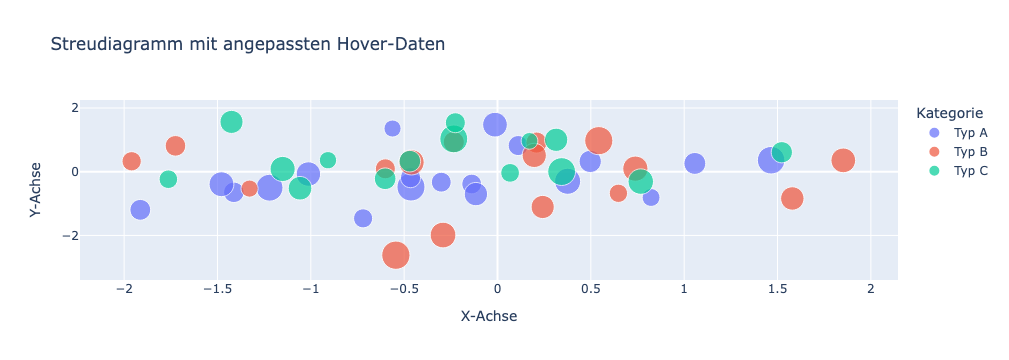

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

# Daten erstellen
np.random.seed(42)
n = 50
x = np.random.normal(0, 1, n)
y = np.random.normal(0, 1, n)
größe = np.random.uniform(10, 30, n)
kategorien = np.random.choice(['Typ A', 'Typ B', 'Typ C'], n)
ids = [f'ID-{i:03d}' for i in range(n)]

df = pd.DataFrame({
    'x': x, 
    'y': y, 
    'Größe': größe,
    'Kategorie': kategorien,
    'ID': ids,
    'Wert': np.random.uniform(0, 100, n)
})

# Streudiagramm mit angepassten Hover-Daten
fig = px.scatter(
    df,
    x='x',
    y='y',
    size='Größe',
    color='Kategorie',
    hover_name='ID',  # Haupttitel im Hover-Tooltip
    hover_data=['Wert', 'Größe'],  # Zusätzliche Spalten für Hover
    title='Streudiagramm mit angepassten Hover-Daten',
    labels={'x': 'X-Achse', 'y': 'Y-Achse', 'Wert': 'Messwert (%)', 'Größe': 'Punktgröße'}
)

fig.show()

**Erklärung:**
- Mit `hover_name='ID'` setzen wir die ID-Spalte als Haupttitel im Hover-Tooltip
- Mit `hover_data=['Wert', 'Größe']` zeigen wir zwei zusätzliche Spalten im Tooltip an
- Mit `labels` definieren wir benutzerfreundlichere Namen für die angezeigten Spalten

### Beispiel 2: Erweiterte Hover-Anpassung mit hover_data Dict

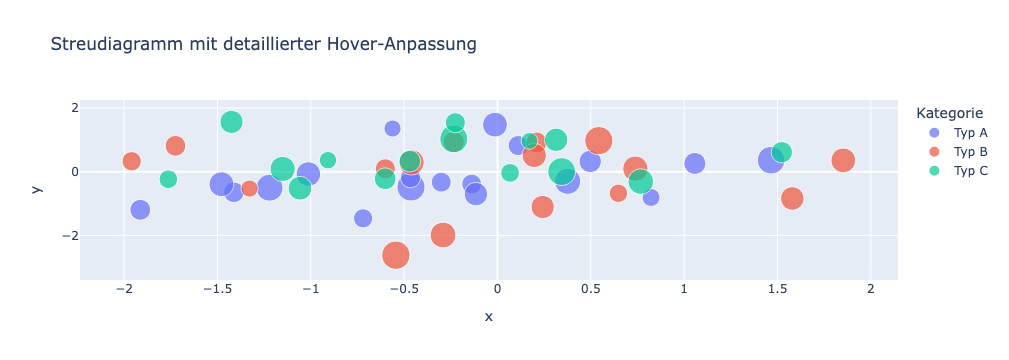

In [2]:
# Erweiterte Hover-Anpassung mit Dictionary
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    size='Größe', 
    color='Kategorie',
    hover_name='ID',
    # Komplexere Hover-Daten-Anpassung
    hover_data={
        'x': False,           # x-Werte ausblenden
        'y': False,           # y-Werte ausblenden
        'Kategorie': True,    # Kategorie anzeigen
        'Wert': ':.2f',       # Wert mit 2 Dezimalstellen anzeigen
        'Größe': ':.1f'       # Größe mit 1 Dezimalstelle anzeigen
    },
    title='Streudiagramm mit detaillierter Hover-Anpassung'
)

fig.show()

**Erklärung:**
- In diesem Beispiel verwenden wir ein Dictionary für `hover_data`, um präzisere Kontrolle zu haben
- Mit `'x': False` und `'y': False` blenden wir die standardmäßigen x- und y-Werte aus
- Mit `'Wert': ':.2f'` und `'Größe': ':.1f'` formatieren wir die Zahlen mit einer bestimmten Anzahl von Dezimalstellen

### Beispiel 3: Vollständig benutzerdefinierte Hover-Templates

In [ ]:
# Benutzerdefiniertes Hover-Template
fig = px.scatter(
    df, 
    x='x', 
    y='y',
    size='Größe', 
    color='Kategorie',
    custom_data=['ID', 'Wert'],  # Daten für das benutzerdefinierte Template
    title='Streudiagramm mit benutzerdefiniertem Hover-Template'
)

# Hover-Template definieren
fig.update_traces(
    hovertemplate=
    '<b>%{customdata[0]}</b><br>' +
    'Kategorie: %{marker.color}<br>' +
    'Wert: %{customdata[1]:.1f}%<br>' +
    'Koordinaten: (%{x:.3f}, %{y:.3f})<br>' +
    '<extra></extra>'  # Entfernt den zweiten Box-Teil des Tooltips
)

fig.show()

**Erklärung:**
- Mit `custom_data` übergeben wir zusätzliche Spalten, die im Template verwendet werden können
- `hovertemplate` definiert das exakte Format des Tooltips mit HTML-Formatierung
- `%{customdata[0]}` und `%{customdata[1]}` greifen auf die in `custom_data` übergebenen Werte zu
- `<extra></extra>` entfernt den standardmäßigen zweiten Teil des Tooltips

#### 1.1 Aufgaben:

> (a) Erstelle ein Liniendiagramm, das den Verlauf einer Aktie über ein Jahr simuliert:
>- Generiere tägliche Daten für ein Jahr (z.B. 365 Punkte)
>- Zeige beim Hover folgende Informationen an: Datum, Schlusskurs, Veränderung zum Vortag in Prozent
>- Formatiere den Schlusskurs mit zwei Dezimalstellen und einem €-Symbol
>- Färbe die Linie basierend auf dem Trend ein (z.B. steigend/fallend)

In [ ]:
# Deine Lösung:




#### Lösung:

In [ ]:
from datetime import datetime, timedelta
# Daten generieren
np.random.seed(42)
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(365)]
# Zufälliger Kurs mit Trend
base_price = 100
volatility = 0.02
trend = 0.0001
price = [base_price]

for i in range(1, 365):
    change = np.random.normal(trend, volatility)
    new_price = price[-1] * (1 + change)
    price.append(new_price)

# Veränderung zum Vortag berechnen
price_change = [0]  # Für den ersten Tag gibt es keine Veränderung
for i in range(1, 365):
    price_change.append((price[i] / price[i-1] - 1) * 100)

# DataFrame erstellen
df = pd.DataFrame({
    'Datum': dates,
    'Kurs': price,
    'Veränderung': price_change
})

# Trend bestimmen (steigend/fallend)
df['Trend'] = np.where(df['Veränderung'] >= 0, 'steigend', 'fallend')

# Liniendiagramm erstellen
fig = px.line(
    df, 
    x='Datum', 
    y='Kurs',
    color='Trend',  # Färbung basierend auf Trend
    color_discrete_map={'steigend': 'green', 'fallend': 'red'},
    title='Aktienkursverlauf über ein Jahr',
    labels={'Kurs': 'Aktienkurs (€)', 'Datum': 'Datum'},
    custom_data=['Kurs', 'Veränderung']  # Daten für das benutzerdefinierte Hover-Template
)

# Hover-Template anpassen
fig.update_traces(
    hovertemplate=
    '<b>%{x|%d.%m.%Y}</b><br>' +
    'Schlusskurs: %{customdata[0]:.2f} €<br>' +
    'Veränderung: %{customdata[1]:.2f}%<br>' +
    '<extra></extra>'  # Entfernt den zweiten Box-Teil des Tooltips
)

# Layout anpassen
fig.update_layout(
    xaxis_title='Datum',
    yaxis_title='Aktienkurs (€)',
    hovermode='x unified'  # Zeigt Hover für alle Traces an einem x-Wert
)

fig.show()

## 2 Filtern und Auswahl

### Was ist Filtern und Auswählen?

Filtern und Auswählen in Plotly ermöglichen es Benutzern, bestimmte Daten ein- oder auszublenden, um sich auf relevante Teile des Datensatzes zu konzentrieren. Dies kann durch Klicken auf Legendeneinträge, durch benutzerdefinierte Schaltflächen oder durch interaktive Filter erreicht werden.

Diese Funktionalität ist besonders nützlich für:
- Vergleich verschiedener Datenkategorien
- Fokussierung auf bestimmte Zeiträume oder Datenbereiche
- Reduzierung der visuellen Komplexität bei großen Datensätzen

### Wie funktioniert Filtern und Auswählen in Plotly?

Es gibt mehrere Möglichkeiten, Filterfunktionen in Plotly zu implementieren:

1. **Legendenfilterung**: Standardmäßig können Benutzer auf Legendeneinträge klicken, um Traces ein-/auszublenden
2. **Buttons und Menüs**: Benutzerdefinierte Steuerelemente, die bestimmte Daten ein-/ausblenden
3. **Bereichsauswahl**: Ermöglicht das Auswählen eines Datenbereichs durch Ziehen
4. **Filter-Widgets**: In Dash oder Jupyter-Widgets für komplexere Interaktionen

### Beispiel 1: Legendenfilterung mit Plotly Express

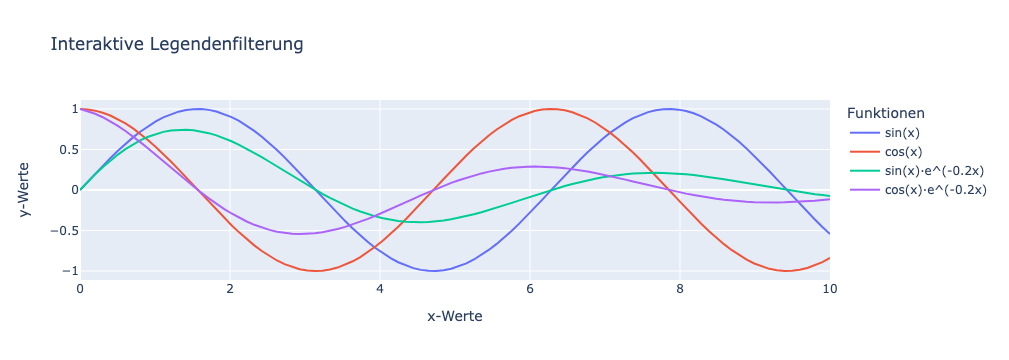

In [3]:
# Daten generieren
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-0.2*x)
y4 = np.cos(x) * np.exp(-0.2*x)

df = pd.DataFrame({
    'x': np.tile(x, 4),
    'y': np.concatenate([y1, y2, y3, y4]),
    'Funktion': np.repeat(['sin(x)', 'cos(x)', 'sin(x)·e^(-0.2x)', 'cos(x)·e^(-0.2x)'], 100)
})

# Liniendiagramm mit Legendenfilterung
fig = px.line(
    df, 
    x='x', 
    y='y', 
    color='Funktion',
    title='Interaktive Legendenfilterung',
    labels={'x': 'x-Werte', 'y': 'y-Werte'}
)

# Legendentitel anpassen
fig.update_layout(legend_title_text='Funktionen')

fig.show()

**Erklärung:**
- Dieses Diagramm zeigt vier verschiedene Funktionen, die durch Farben unterschieden werden
- Nutzer können in der Legende auf einzelne Einträge klicken, um bestimmte Funktionen ein-/auszublenden
- Doppelklick auf einen Legendeneintrag isoliert diese Funktion
- Doppelklick auf die Legende stellt alle Funktionen wieder her

### Beispiel 2: Benutzerdefinierte Filterbuttons

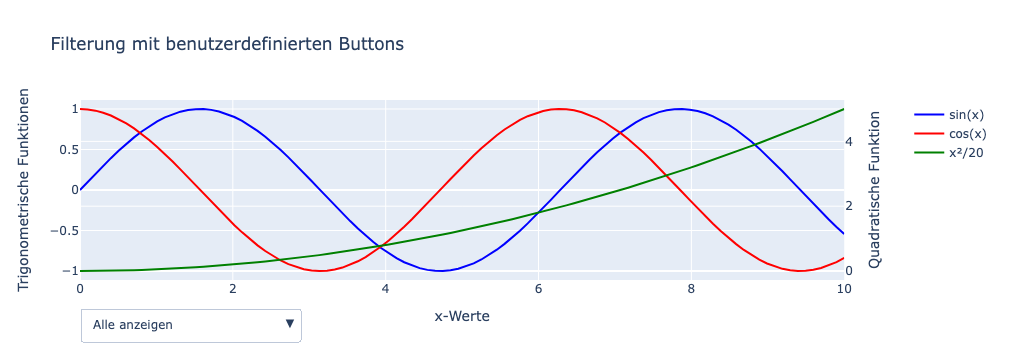

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Daten generieren
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2 / 20  # Skaliert für bessere Sichtbarkeit

# Figur mit zweiter y-Achse erstellen
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Traces hinzufügen
fig.add_trace(
    go.Scatter(x=x, y=y1, name="sin(x)", line=dict(color="blue")),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=x, y=y2, name="cos(x)", line=dict(color="red")),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(x=x, y=y3, name="x²/20", line=dict(color="green")),
    secondary_y=True
)

# Titel und Achsenbeschriftungen
fig.update_layout(
    title_text="Filterung mit benutzerdefinierten Buttons",
    xaxis_title="x-Werte"
)

fig.update_yaxes(title_text="Trigonometrische Funktionen", secondary_y=False)
fig.update_yaxes(title_text="Quadratische Funktion", secondary_y=True)

# Filterschaltflächen hinzufügen
buttons = [
    dict(
        label="Alle anzeigen",
        method="update",
        args=[{"visible": [True, True, True]},
              {"title": "Alle Funktionen"}]
    ),
    dict(
        label="Nur sin(x)",
        method="update",
        args=[{"visible": [True, False, False]},
              {"title": "Nur sin(x)"}]
    ),
    dict(
        label="Nur cos(x)",
        method="update",
        args=[{"visible": [False, True, False]},
              {"title": "Nur cos(x)"}]
    ),
    dict(
        label="Nur x²/20",
        method="update",
        args=[{"visible": [False, False, True]},
              {"title": "Nur x²/20"}]
    ),
    dict(
        label="Trigonometrische Funktionen",
        method="update",
        args=[{"visible": [True, True, False]},
              {"title": "Trigonometrische Funktionen"}]
    )
]

# Menü für Buttons hinzufügen
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.0,
            xanchor="left",
            y=-0.1,
            yanchor="top"
        )
    ]
)

fig.show()

**Erklärung:**
- Wir erstellen ein Diagramm mit drei verschiedenen Funktionen und zwei y-Achsen
- Mit `updatemenus` fügen wir ein Dropdown-Menü mit verschiedenen Filteroptionen hinzu
- Jeder Button im Dropdown ändert die Sichtbarkeit der verschiedenen Traces
- Der `method="update"` Parameter bestimmt, was passiert, wenn ein Button geklickt wird
- `args` definiert, welche Eigenschaften aktualisiert werden (hier Sichtbarkeit und Titel)

### Beispiel 3: Bereichsauswahl und Animation

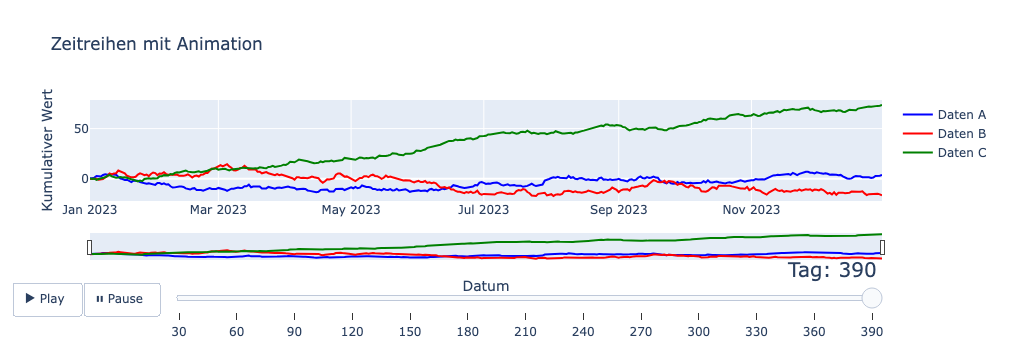

In [5]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots

# Zeitreihendaten generieren
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
value1 = np.cumsum(np.random.normal(0, 1, len(dates)))
value2 = np.cumsum(np.random.normal(0, 1.2, len(dates)))
value3 = np.cumsum(np.random.normal(0.1, 0.8, len(dates)))

df = pd.DataFrame({
    'Datum': np.tile(dates, 3),
    'Wert': np.concatenate([value1, value2, value3]),
    'Reihe': np.repeat(['Daten A', 'Daten B', 'Daten C'], len(dates))
})

# Figure erstellen
fig = go.Figure()

# Vollständige Daten hinzufügen (initial hidden)
colors = ['blue', 'red', 'green']
for i, reihe in enumerate(['Daten A', 'Daten B', 'Daten C']):
    reihe_data = df[df['Reihe'] == reihe]
    fig.add_trace(go.Scatter(
        x=reihe_data['Datum'], 
        y=reihe_data['Wert'],
        mode='lines',
        name=reihe,
        line=dict(color=colors[i])
    ))

# Animation frames erstellen - viel einfacher!
frames = []
step_size = 30  # Alle 30 Tage ein Frame
for step in range(step_size, len(dates) + step_size, step_size):
    end_idx = min(step, len(dates))
    
    frame_traces = []
    for i, reihe in enumerate(['Daten A', 'Daten B', 'Daten C']):
        reihe_data = df[df['Reihe'] == reihe].iloc[:end_idx]
        frame_traces.append(go.Scatter(
            x=reihe_data['Datum'],
            y=reihe_data['Wert'],
            mode='lines',
            name=reihe,
            line=dict(color=colors[i])
        ))
    
    frames.append(go.Frame(
        data=frame_traces,
        name=f"frame_{len(frames)}"
    ))

fig.frames = frames

# Layout mit funktionierenden Buttons
fig.update_layout(
    title='Zeitreihen mit Animation',
    xaxis_title='Datum',
    yaxis_title='Kumulativer Wert',
    
    # Range slider
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    
    # Animation buttons
    updatemenus=[{
        'type': 'buttons',
        'buttons': [
            {
                'label': '▶ Play',
                'method': 'animate',
                'args': [None, {
                    'frame': {'duration': 200, 'redraw': True},
                    'fromcurrent': True,
                    'transition': {'duration': 100}
                }]
            },
            {
                'label': '⏸ Pause', 
                'method': 'animate',
                'args': [[None], {
                    'frame': {'duration': 0, 'redraw': False},
                    'mode': 'immediate'
                }]
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 10},
        'showactive': False,
        'x': 0.1,
        'xanchor': 'right',
        'y': -0.7,
        'yanchor': 'top'
    }],
    
    # Slider für manuelle Kontrolle
    sliders=[{
        'active': len(frames) - 1,
        'yanchor': 'top',
        'xanchor': 'left', 
        'currentvalue': {
            'font': {'size': 20},
            'prefix': 'Tag: ',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 100},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [
            {
                'args': [
                    [f"frame_{i}"],
                    {
                        'frame': {'duration': 100, 'redraw': True},
                        'mode': 'immediate',
                        'transition': {'duration': 100}
                    }
                ],
                'label': f"{(i+1)*step_size}",
                'method': 'animate'
            } for i in range(len(frames))
        ]
    }]
)

fig.show()

**Erklärung:**
- Wir erstellen ein Liniendiagramm mit drei Zeitreihen
- Mit `rangeslider=dict(visible=True)` fügen wir einen Schieberegler unter der x-Achse hinzu, der das Auswählen eines Zeitbereichs ermöglicht
- Wir fügen Animations-Buttons hinzu, die die Daten über die Zeit abspielen
- Ein zusätzlicher Schieberegler ermöglicht das Springen zu bestimmten Quartalen

#### 2.1 Aufgaben:

> (a) Erstelle ein Streudiagramm mit Filterfunktionen für Messdaten von verschiedenen Sensoren:
>- Generiere simulierte Messdaten für 4 verschiedene Sensoren über einen Zeitraum von 24 Stunden
>- Füge Buttons hinzu, um zwischen den einzelnen Sensoren oder allen gleichzeitig zu wechseln
>- Implementiere einen Bereichsschieberegler, um den Zeitbereich einzugrenzen
>- Stelle sicher, dass die Legende zum Filtern verwendet werden kann

In [ ]:
# Deine Lösung:




#### Lösung:

In [ ]:
# Daten generieren
np.random.seed(42)
start_time = datetime(2023, 5, 1)
hours = 24
times = [start_time + timedelta(hours=i) for i in range(hours)]
sensors = ['Sensor A', 'Sensor B', 'Sensor C', 'Sensor D']

# Verschiedene Charakteristiken für jeden Sensor
base_values = [20, 25, 22, 18]  # Basiswerte
amplitudes = [2, 3, 1.5, 4]     # Amplituden
noise_levels = [0.5, 0.8, 0.3, 1]  # Rauschpegel

# DataFrame erstellen
data = []

for i, sensor in enumerate(sensors):
    # Sinusförmiger Tagesverlauf mit Rauschen und Basiswert
    base = base_values[i]
    amp = amplitudes[i]
    noise = noise_levels[i]
    
    for hour in range(hours):
        time = times[hour]
        # Sinuskurve mit Periode von 24 Stunden
        value = base + amp * np.sin(2 * np.pi * hour / 24) + np.random.normal(0, noise)
        data.append({'Zeit': time, 'Sensor': sensor, 'Messwert': value})

df = pd.DataFrame(data)

# Figur erstellen
fig = go.Figure()

# Einen Trace für jeden Sensor hinzufügen
for sensor in sensors:
    sensor_data = df[df['Sensor'] == sensor]
    fig.add_trace(
        go.Scatter(
            x=sensor_data['Zeit'],
            y=sensor_data['Messwert'],
            mode='lines+markers',
            name=sensor
        )
    )

# Layout anpassen
fig.update_layout(
    title='Sensormesswerte über 24 Stunden',
    xaxis_title='Zeit',
    yaxis_title='Messwert',
    legend_title='Sensoren',
    # Bereichsschieberegler hinzufügen
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'
    ),
    # Filterschaltflächen hinzufügen
    updatemenus=[
        dict(
            active=0,
            buttons=[
                dict(
                    label="Alle Sensoren",
                    method="update",
                    args=[{"visible": [True, True, True, True]},
                         {"title": "Alle Sensoren"}]
                ),
                dict(
                    label="Sensor A",
                    method="update",
                    args=[{"visible": [True, False, False, False]},
                         {"title": "Nur Sensor A"}]
                ),
                dict(
                    label="Sensor B",
                    method="update",
                    args=[{"visible": [False, True, False, False]},
                         {"title": "Nur Sensor B"}]
                ),
                dict(
                    label="Sensor C",
                    method="update",
                    args=[{"visible": [False, False, True, False]},
                         {"title": "Nur Sensor C"}]
                ),
                dict(
                    label="Sensor D",
                    method="update",
                    args=[{"visible": [False, False, False, True]},
                         {"title": "Nur Sensor D"}]
                ),
                dict(
                    label="Sensoren A & B",
                    method="update",
                    args=[{"visible": [True, True, False, False]},
                         {"title": "Sensoren A & B"}]
                ),
                dict(
                    label="Sensoren C & D",
                    method="update",
                    args=[{"visible": [False, False, True, True]},
                         {"title": "Sensoren C & D"}]
                )
            ],
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0,
            xanchor="left",
            y=1.55,
            yanchor="top"
        )
    ]
)

# Hinweis zur Legende hinzufügen
fig.add_annotation(
    x=0.5,
    y=1.05,
    xref="paper",
    yref="paper",
    text="Klicke auf Legendeneinträge zum Ein-/Ausblenden einzelner Sensoren",
    showarrow=False,
    font=dict(size=12),
    align="center",
    bgcolor="rgba(255, 255, 255, 0.7)"
)

fig.show()

## 3. Zoomen und Schwenken

### Wie funktioniert Zoomen und Schwenken in Plotly?

In Plotly ist Zoomen und Schwenken standardmäßig aktiviert. Benutzer können:

- **Zoomen**:
  - Mit dem Mausrad zoomen
  - Einen Bereich zum Zoomen aufziehen
  - Die Zoom-Schaltflächen in der Werkzeugleiste verwenden
  
- **Schwenken (Panning)**:
  - In einem gezoomten Diagramm klicken und ziehen
  - Die Pfeiltasten in der Werkzeugleiste verwenden

Du kannst dieses Verhalten anpassen oder erweitern mit:
- Benutzerdefinierten Schaltflächen zum Zoomen auf bestimmte Bereiche
- Automatischem Zoomen auf relevante Datenbereiche
- Einschränkung der Zoom- und Schwenkbereiche

### Beispiel 1: Grundlegendes Zoomen und Schwenken

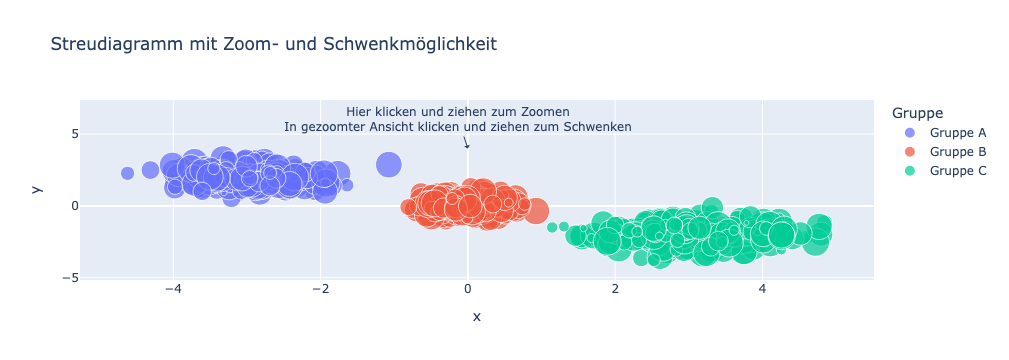

In [6]:
# Dichte Daten generieren
np.random.seed(42)
n = 1000
x = np.concatenate([
    np.random.normal(-3, 0.5, n//3),   # Cluster links
    np.random.normal(0, 0.3, n//3),    # Cluster Mitte
    np.random.normal(3, 0.7, n//3 + n%3)  # Cluster rechts (Rest-Punkte hinzufügen)
])
y = np.concatenate([
    np.random.normal(2, 0.5, n//3),    # Cluster links
    np.random.normal(0, 0.4, n//3),    # Cluster Mitte
    np.random.normal(-2, 0.6, n//3 + n%3)  # Cluster rechts (Rest-Punkte hinzufügen)
])

# Gruppen-Array mit korrekter Länge erstellen
gruppen = []
for i, gruppe in enumerate(['Gruppe A', 'Gruppe B', 'Gruppe C']):
    if i < 2:
        anzahl = n//3
    else:
        anzahl = n//3 + n%3  # Restliche Punkte zur letzten Gruppe hinzufügen
    gruppen.extend([gruppe] * anzahl)

df = pd.DataFrame({
    'x': x, 
    'y': y, 
    'Gruppe': gruppen,
    'Wert': np.random.uniform(0, 100, n)
})

# Streudiagramm mit Zoom-Hinweis
fig = px.scatter(
    df, 
    x='x', 
    y='y', 
    color='Gruppe',
    hover_name='Gruppe',
    hover_data=['Wert'],
    size='Wert',
    opacity=0.7,
    title='Streudiagramm mit Zoom- und Schwenkmöglichkeit'
)

# Hinweis zum Zoomen hinzufügen
fig.add_annotation(
    x=0, y=4,
    text="Hier klicken und ziehen zum Zoomen<br>In gezoomter Ansicht klicken und ziehen zum Schwenken",
    showarrow=True,
    arrowhead=1
)

fig.show()

**Erklärung:**
- Wir erstellen ein Streudiagramm mit drei Clustern von Punkten
- Die Standardinteraktivität von Plotly ermöglicht bereits Zoomen und Schwenken
- Der Benutzer kann einen Bereich aufziehen, um in diesen Bereich zu zoomen
- Nach dem Zoomen kann der Benutzer klicken und ziehen, um zu schwenken
- Die Annotation gibt dem Benutzer einen Hinweis auf diese Funktionen

### Beispiel 2: Anpassung des Zoom- und Schwenkverhaltens

In [ ]:
# Daten für ein Höhenliniendiagramm generieren
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x, y)
z = np.sin(np.sqrt(x_grid**2 + y_grid**2))

# Höhenliniendiagramm erstellen
fig = px.imshow(
    z,
    x=x,
    y=y,
    color_continuous_scale='Viridis',
    title='Höhenliniendiagramm mit angepasstem Zoom-Verhalten'
)

# Zoom- und Schwenkverhalten anpassen
fig.update_layout(
    dragmode='pan',  # Standardverhalten auf Schwenken setzen
    newshape_line_color='cyan',
    # Grenzen für Zoom setzen
    xaxis=dict(
        range=[-6, 6],     # Initiale Ansicht
        scaleanchor="y",   # x-Achse an y-Achse ankern für gleiches Skalenverhältnis
        scaleratio=1,      # 1:1 Verhältnis zwischen x und y
        constrain='domain' # Einschränkung innerhalb des Domänenbereichs
    ),
    yaxis=dict(
        range=[-6, 6],
        constrain='domain'
    ),
    # Zoom-Buttons hinzufügen
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            buttons=[
                dict(
                    args=[{
                        'xaxis.range': [-6, 6],
                        'yaxis.range': [-6, 6]
                    }],
                    label="Vollständige Ansicht",
                    method="relayout"
                ),
                dict(
                    args=[{
                        'xaxis.range': [-2, 2],
                        'yaxis.range': [-2, 2]
                    }],
                    label="Zentraler Bereich",
                    method="relayout"
                ),
                dict(
                    args=[{
                        'xaxis.range': [-5, -2],
                        'yaxis.range': [2, 5]
                    }],
                    label="Obere linke Ecke",
                    method="relayout"
                )
            ],
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Werkzeugleiste anpassen
fig.update_layout(
    modebar=dict(
        orientation='v',
        bgcolor='rgba(255,255,255,0.7)',
        color='rgba(38, 12, 12, 0.3)',
        activecolor='rgba(38, 12, 12, 0.8)'
    )
)

fig.show()

**Erklärung:**
- Wir erstellen ein Höhenliniendiagramm mit komplexen Daten
- Mit `dragmode='pan'` setzen wir das Standardverhalten auf Schwenken statt Zoomen
- Wir definieren Grenzen und Verhältnisse für die Achsen mit `xaxis` und `yaxis`
- Wir fügen Schaltflächen hinzu, die zu vordefinierten Zoom-Bereichen springen
- Wir passen das Aussehen und die Position der Werkzeugleiste an

### Beispiel 3: Zoom- und Schwenkfunktionen in einer komplexen Visualisierung

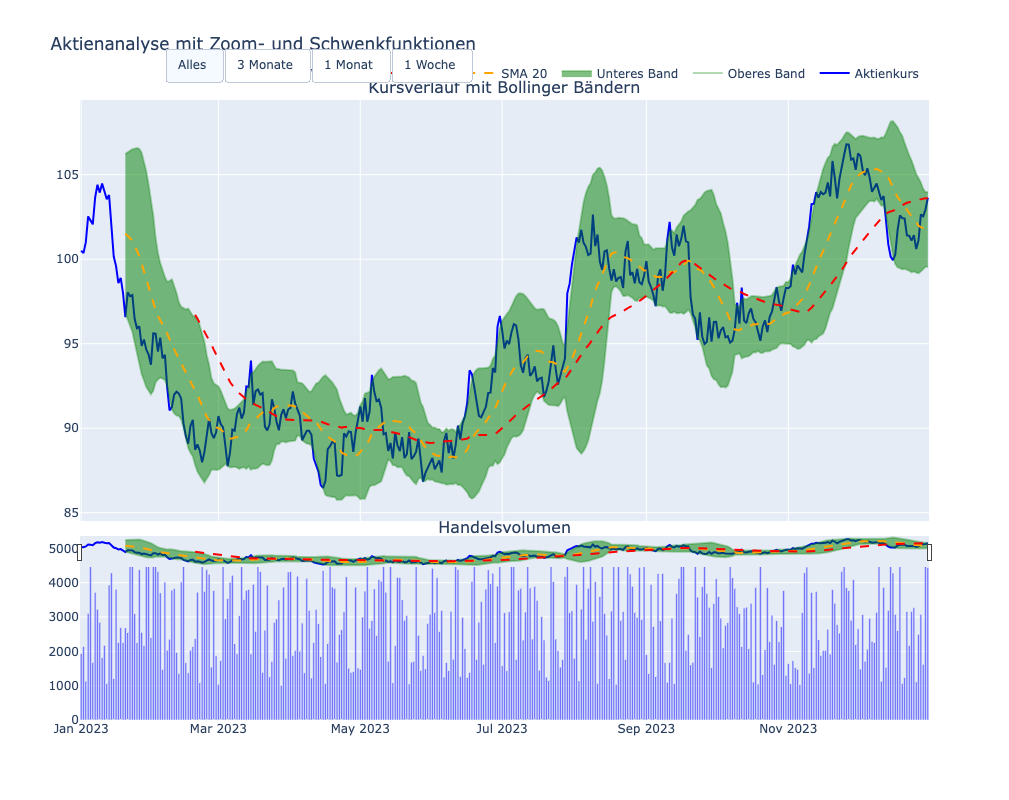

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Komplexere Daten für eine Finanzvisualisierung generieren
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
price_array = 100 + np.cumsum(np.random.normal(0, 1, len(dates)))
volume = np.random.randint(1000, 5000, len(dates))

# Umwandlung des NumPy-Arrays in eine Pandas Series für rolling-Funktionen
price = pd.Series(price_array)

# Technische Indikatoren berechnen
sma_20 = price.rolling(window=20).mean()
sma_50 = price.rolling(window=50).mean()
upper_band = sma_20 + 2 * price.rolling(window=20).std()
lower_band = sma_20 - 2 * price.rolling(window=20).std()

# DataFrame erstellen
df = pd.DataFrame({
    'Datum': dates,
    'Preis': price,
    'Volumen': volume,
    'SMA_20': sma_20,
    'SMA_50': sma_50,
    'Upper_Band': upper_band,
    'Lower_Band': lower_band
})

# Subplot mit Kurs- und Volumenchart erstellen
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    row_heights=[0.7, 0.3],
    subplot_titles=("Kursverlauf mit Bollinger Bändern", "Handelsvolumen")
)

# Preischart hinzufügen
fig.add_trace(
    go.Scatter(
        x=df['Datum'],
        y=df['Preis'],
        mode='lines',
        name='Aktienkurs',
        line=dict(color='blue')
    ),
    row=1, col=1
)

# Bollinger Bänder hinzufügen
fig.add_trace(
    go.Scatter(
        x=df['Datum'],
        y=df['Upper_Band'],
        mode='lines',
        name='Oberes Band',
        line=dict(color='rgba(0,128,0,0.3)')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['Datum'],
        y=df['Lower_Band'],
        mode='lines',
        name='Unteres Band',
        line=dict(color='rgba(0,128,0,0.3)'),
        fill='tonexty'  # Bereich zwischen diesem und vorherigem Trace füllen
    ),
    row=1, col=1
)

# Gleitende Durchschnitte hinzufügen
fig.add_trace(
    go.Scatter(
        x=df['Datum'],
        y=df['SMA_20'],
        mode='lines',
        name='SMA 20',
        line=dict(color='orange', dash='dash')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df['Datum'],
        y=df['SMA_50'],
        mode='lines',
        name='SMA 50',
        line=dict(color='red', dash='dash')
    ),
    row=1, col=1
)

# Volumen-Chart hinzufügen
fig.add_trace(
    go.Bar(
        x=df['Datum'],
        y=df['Volumen'],
        name='Volumen',
        marker=dict(color='rgba(0,0,255,0.5)')
    ),
    row=2, col=1
)

# Layout anpassen
fig.update_layout(
    title_text='Aktienanalyse mit Zoom- und Schwenkfunktionen',
    height=800,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Bereichsauswahl für beide Achsen hinzufügen
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date',
        rangeslider_thickness=0.05
    ),
    xaxis2=dict(
        type='date'
    )
)

# Zoom-Buttons hinzufügen
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            buttons=[
                dict(
                    args=[{'xaxis.range': [df['Datum'].min(), df['Datum'].max()]}],
                    label="Alles",
                    method="relayout"
                ),
                dict(
                    args=[{'xaxis.range': [df['Datum'].iloc[-90], df['Datum'].max()]}],
                    label="3 Monate",
                    method="relayout"
                ),
                dict(
                    args=[{'xaxis.range': [df['Datum'].iloc[-30], df['Datum'].max()]}],
                    label="1 Monat",
                    method="relayout"
                ),
                dict(
                    args=[{'xaxis.range': [df['Datum'].iloc[-7], df['Datum'].max()]}],
                    label="1 Woche",
                    method="relayout"
                )
            ],
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.show()

**Erklärung:**
- Wir erstellen eine komplexe Finanzvisualisierung mit mehreren Diagrammen und Indikatoren
- Die Diagramme teilen sich eine gemeinsame x-Achse durch `shared_xaxes=True`
- Mit `rangeslider=dict(visible=True)` fügen wir einen Bereichsschieberegler hinzu
- Die Zoom-Buttons ermöglichen das schnelle Wechseln zwischen verschiedenen Zeiträumen
- Alle Diagramme werden synchron gezoomt und geschwenkt, da sie verknüpft sind

### 3.1 Aufgaben:

> (a) Erstelle ein interaktives Höhenliniendiagramm für eine 2D-Funktion mit folgenden Eigenschaften:
>- Visualisiere die Funktion f(x,y) = sin(x²+y²)/sqrt(x²+y²) im Bereich -5 ≤ x,y ≤ 5
>- Implementiere Zoom-Buttons für verschiedene interessante Bereiche der Funktion
>- Füge eine Annotation hinzu, die beim Zoomen an der gleichen Position bleibt
>- Stelle sicher, dass das Seitenverhältnis beim Zoomen beibehalten wird

In [ ]:
# Deine Lösung:




#### Lösung:

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Funktion definieren
def f(x, y):
    r = x**2 + y**2
    # Vermeidung der Division durch Null im Ursprung
    r = np.where(r < 1e-10, 1e-10, r)
    return np.sin(r) / np.sqrt(r)

# Gitter erstellen
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Figur erstellen
fig = go.Figure(data=
    go.Contour(
        z=Z,
        x=x,
        y=y,
        colorscale='Viridis',
        contours=dict(
            showlabels=True,
            labelfont=dict(size=12, color='white')
        )
    )
)

# Layout anpassen
fig.update_layout(
    title='Höhenliniendiagramm der Funktion f(x,y) = sin(x²+y²)/sqrt(x²+y²)',
    xaxis_title='x',
    yaxis_title='y',
    height=700,
    width=700,
    # Gleiches Seitenverhältnis erzwingen
    xaxis=dict(
        scaleanchor="y",
        scaleratio=1,
        constrain='domain'
    ),
    yaxis=dict(
        constrain='domain'
    )
)

# Zoom-Buttons hinzufügen
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            buttons=[
                dict(
                    args=[{
                        'xaxis.range': [-5, 5],
                        'yaxis.range': [-5, 5]
                    }],
                    label="Gesamtansicht",
                    method="relayout"
                ),
                dict(
                    args=[{
                        'xaxis.range': [-1, 1],
                        'yaxis.range': [-1, 1]
                    }],
                    label="Zentrum",
                    method="relayout"
                ),
                dict(
                    args=[{
                        'xaxis.range': [2, 3],
                        'yaxis.range': [2, 3]
                    }],
                    label="Oberer rechter Bereich",
                    method="relayout"
                ),
                dict(
                    args=[{
                        'xaxis.range': [-3, -2],
                        'yaxis.range': [-3, -2]
                    }],
                    label="Unterer linker Bereich",
                    method="relayout"
                )
            ],
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Annotation hinzufügen, die an fester Position im Koordinatensystem bleibt
fig.add_annotation(
    x=0,
    y=0,
    text="Zentrum (0,0)",
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=0,
    ay=-40,
    bordercolor="#c7c7c7",
    borderwidth=2,
    borderpad=4,
    bgcolor="#ff7f0e",
    opacity=0.8,
    font=dict(
        color="#ffffff"
    )
)

# Zusätzliche Annotation für Erklärung hinzufügen
fig.add_annotation(
    xref="paper",
    yref="paper",
    x=0.5,
    y=1.05,
    text="Nutze die Buttons zum Zoomen in verschiedene Bereiche oder ziehe einen Bereich auf",
    showarrow=False,
    font=dict(size=12),
    align="center",
    bgcolor="rgba(255, 255, 255, 0.7)"
)

fig.show()

# Fazit: Interaktive Funktionen in Plotly

Dieses Notebook konzentrierte sich auf die einzigartigen interaktiven Funktionen, die Plotly von anderen Visualisierungsbibliotheken abheben. Wir haben drei Hauptaspekte der Interaktivität untersucht:

Hover-Daten ermöglichen die Anzeige zusätzlicher Kontextinformationen, wenn Benutzer mit der Maus über Datenpunkte fahren. Wir haben gelernt, wie man diese Informationen durch verschiedene Parameter anpasst und vollständig benutzerdefinierte Hover-Templates erstellt, um die Benutzererfahrung zu verbessern.

Mit Filterfunktionen können Benutzer Daten dynamisch ein- und ausblenden, um sich auf relevante Teile eines Datensatzes zu konzentrieren. Wir haben sowohl die integrierte Legendenfilterung als auch benutzerdefinierte Lösungen mit Buttons, Dropdown-Menüs und Bereichsauswahl implementiert.

Zoom- und Schwenkfunktionen ermöglichen die Navigation innerhalb von Visualisierungen für detailliertere Betrachtungen. Wir haben gesehen, wie diese Funktionen standardmäßig aktiviert sind und wie sie durch benutzerdefinierte Steuerelemente und Einstellungen erweitert werden können.

Diese interaktiven Funktionen machen Plotly besonders wertvoll für explorative Datenanalyse, Dashboard-Erstellung und die Kommunikation komplexer Datenmuster, da sie es den Benutzern ermöglichen, aktiv mit den Daten zu interagieren, anstatt passive Betrachter zu sein.